# <center>**TP**</center>

<img src="../images/logo2_matplotlib.svg">
<div style="text-align:center">
    Bertrand Néron
    <br />
    <a src=" https://research.pasteur.fr/en/team/bioinformatics-and-biostatistics-hub/">Bioinformatics and Biostatistiqucs HUB</a>
    <br />
    © Institut Pasteur, 2021
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Plot

We provide 3 data sets which can be loaded as below

In [3]:
data1 = np.load("../data/data_1.npy")
data2 = np.load("../data/data_2.npy")
freqs = np.load("../data/freqs.npy")

check the data structure of these data

<img src="../images/data.png">

We want to compare more in details a subset of *data_1* and *data_2*
we have to extract from the 4th row, 3rd columns all data in z
for data1 and data2

* these values will be plotted on the y abscisse using the freqs data as x abcisse
* plot data1 as plain line and data 2 in dashed line
* add a legend
* add tile to the figure and abscisses

the resulting figure should looklike below

<img src="../images/plot_data1_vs_data2.png" width="300px">

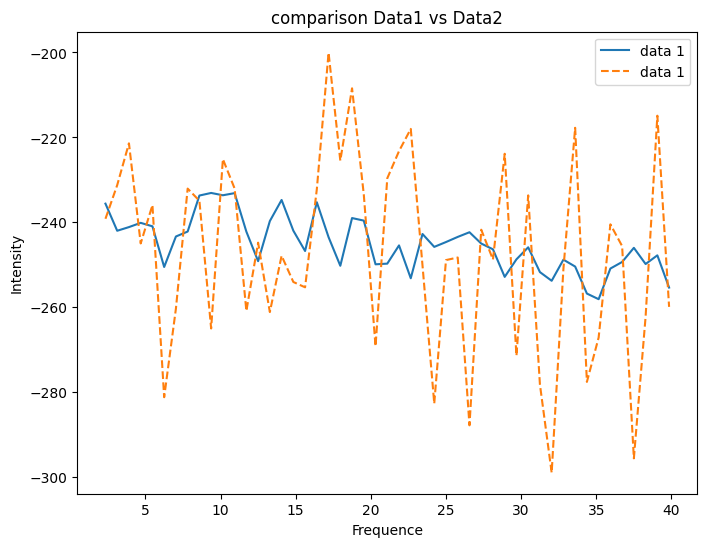

In [4]:
fig = plt.figure(figsize=(8,6))
plt.plot(freqs, data1[3,4,:], label="data 1")
plt.plot(freqs, data2[3,4,:], linestyle="--", label="data 1")
plt.xlabel("Frequence")
plt.ylabel("Intensity")
plt.title("comparison Data1 vs Data2")
plt.legend()

# Bar plot

We have generated a file with different experimental conditions and a control. For each conditions several mesures where taken.
We want to display these results as a bar plot.

* each bar represent the mean for each condition
* the mean for each condition must be write on the plot
* each bar must display the standard deviation
* and the name of the condition must be display on the x abcsisse
  as in sceenshot below

<img src="../images/barplot.png" width="300px">


before to open the file with pandas have a loook on it.

In [5]:
data_bar = pd.read_csv("../data/bar_data.tsv", sep="\t", comment='#')

check the structure of your data

In [6]:
print(data_bar.shape)
print(data_bar.columns)

(20, 4)
Index(['cond1', 'cond2', 'cond3', 'control'], dtype='object')


In [7]:
data_bar.head()

,cond1,cond2,cond3,control
0,14.644417,2.945309,24.811719,5.114340
1,12.071043,4.406424,21.574601,2.507118
2,8.227469,3.185252,20.651623,4.449593
3,8.980799,9.233560,24.859737,4.127919
4,9.080359,5.629192,18.443504,4.268572


In [8]:
desc = data_bar.describe()
desc

,cond1,cond2,cond3,control
count,20.000000,20.000000,20.000000,20.000000
mean,11.200424,4.914373,19.729708,3.882791
std,3.126661,2.315690,3.684203,0.739996
min,7.022382,0.717714,10.613455,2.507118
25%,8.792467,3.670328,18.001254,3.273711
50%,11.145291,4.685109,19.962329,3.915296
75%,12.980845,5.847649,22.332247,4.313827
max,17.400218,9.868423,24.859737,5.255738


do the bar plot

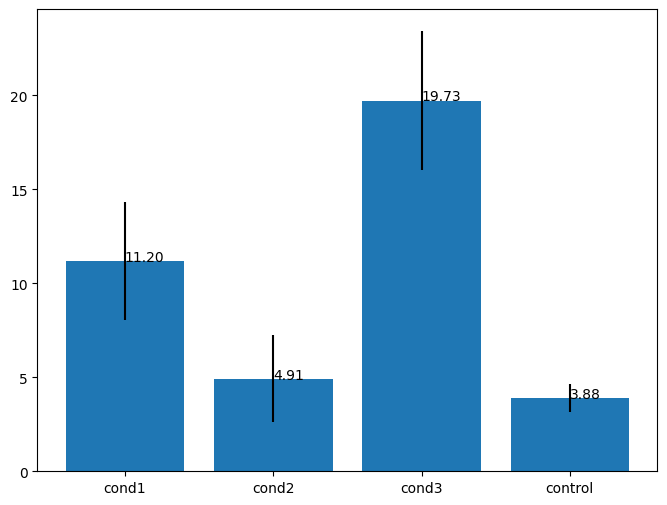

In [9]:
fig = plt.figure(figsize=(8,6))
means = desc.loc['mean', :]
recs = plt.bar(desc.columns, means, yerr=desc.loc['std', :])
for idx, data in enumerate(means):
    plt.text(x=idx, y=data , s=f"{data:.2f}")


# Histogram

We want to study the pixel intensity distributon of the koala image.
We want to do this for each layer separately.
so we decide to create an histogram like below.

<img src="../images/histogram_pixels.png" width="300px">

In [11]:
from matplotlib import image

In [13]:
koala = image.imread('../data/koala.jpeg')

In [14]:
red = koala[:, :, 0]
green = koala[:, :, 1]
blue = koala[:, :, 2]

In [15]:
red.max(), green.max(), blue.max()

(np.uint8(255), np.uint8(255), np.uint8(255))

to know which colored are available in matplotlib visit:
https://matplotlib.org/stable/gallery/color/named_colors.html

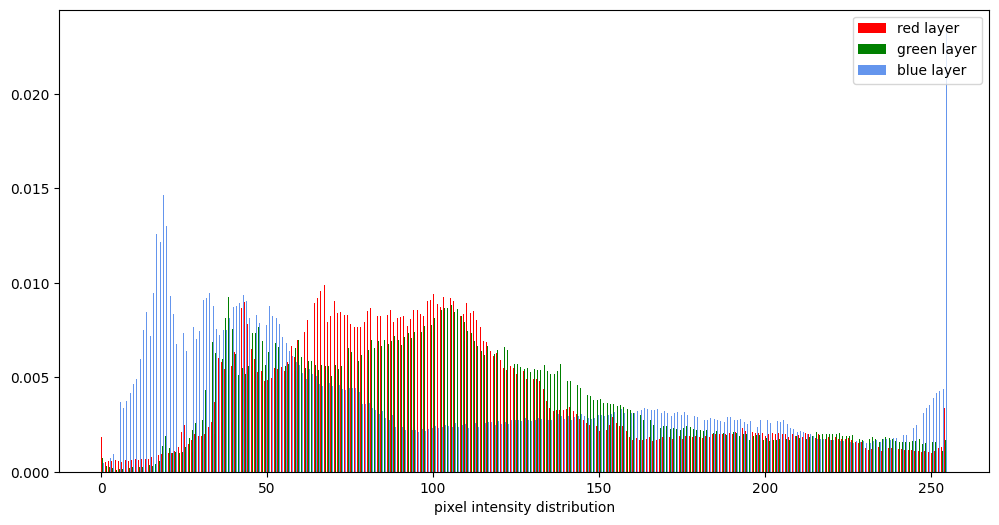

In [16]:
fig = plt.figure(figsize=(12,6))
_ = plt.hist([red.flatten(), green.flatten(), blue.flatten()], bins=255, 
             label=[f'{c} layer'for c in ('red', 'green', 'blue')], 
             color=['red', 'green', 'cornflowerblue'],
             density=True
            )

plt.xlabel("pixel intensity distribution")
plt.legend(loc="upper right")

## standardization

create a data set with 2000 samples
* with a normal distribution 
* centered on 5.0 
* with 3.0 as standard deviation 

In [17]:
data = np.random.normal(loc=5.0, scale=3.0, size=2000)
print(data.mean())
print(data.std())

4.976981778880368
3.0767354320040905


Standardized this dataset, and compare the 2 distributions

In [18]:
d_std = (data - data.mean()) / data.std()
print(d_std.mean())
print(d_std.std())

4.440892098500626e-18
1.0000000000000002


Normalized the dataset, and compare the 2 distributions

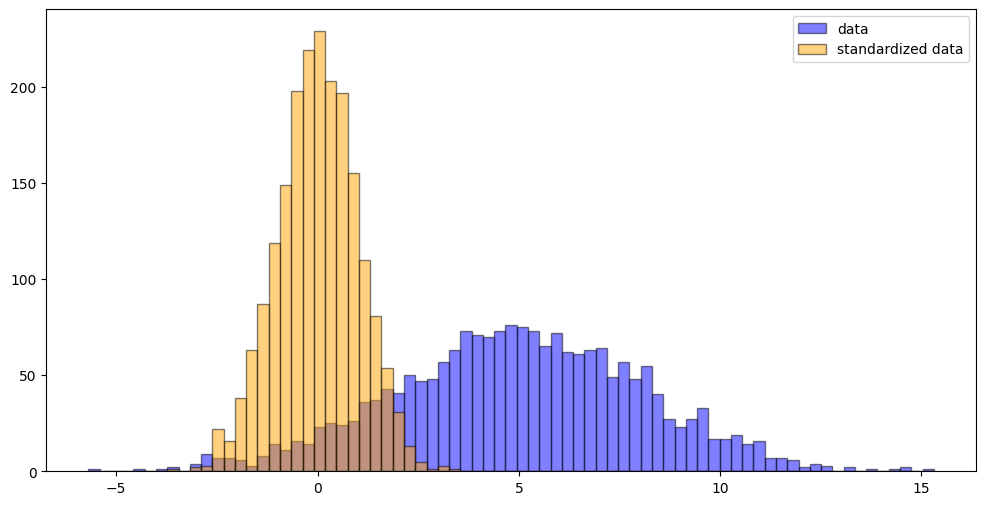

In [19]:
fig = plt.figure(figsize=(12,6))
_, bins, _= plt.hist(data, color='blue', alpha=0.5, bins=75, ec='k', label='data')
_ = plt.hist(d_std, color='orange', alpha=0.5, bins=bins, ec='k', label='standardized data')
plt.legend()

Now do the same operation on 2D array, and standardized each column.

In [20]:
data = np.array([np.random.normal(loc=5.0, scale=3.0, size=2000),
                 np.random.normal(loc=2.0, scale=2.0, size=2000)]
               ).T

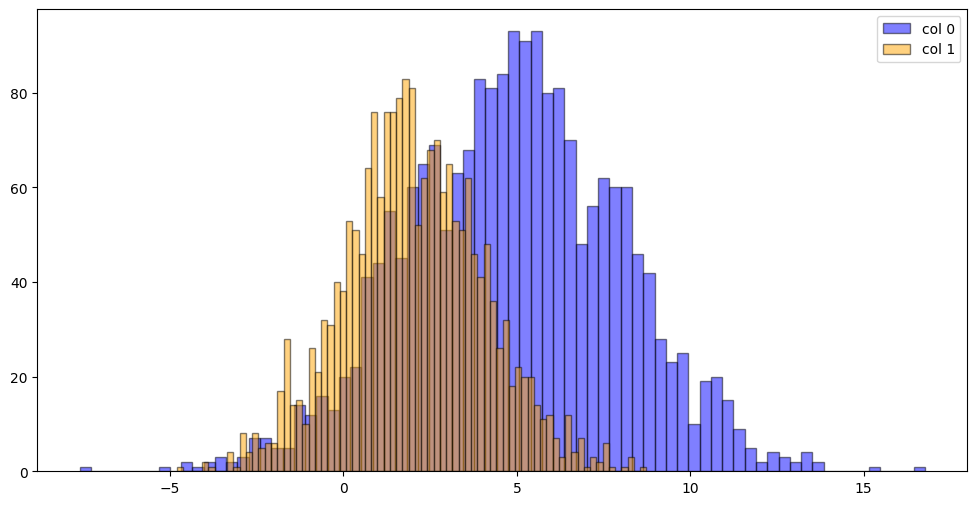

In [21]:
fig = plt.figure(figsize=(12,6))
_ = plt.hist(data[:, 0], bins=75, color='blue', alpha=0.5, ec='k', label='col 0')
_ = plt.hist(data[:, 1], bins=75, color='orange', alpha=0.5, ec='k', label='col 1')
plt.legend()

In [22]:
data_std = (data - data.mean(axis=0)) / data.std(axis=0)

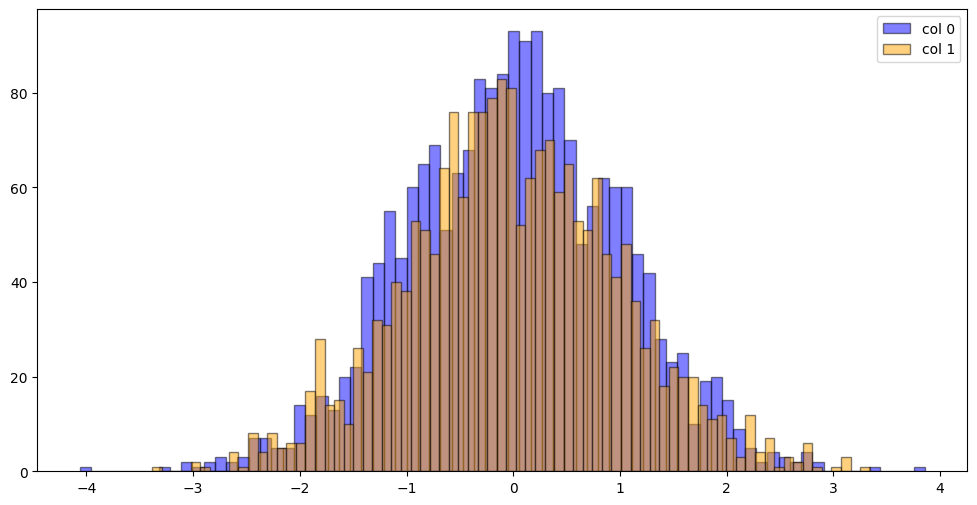

In [23]:
fig = plt.figure(figsize=(12,6))
_ = plt.hist(data_std[:, 0], bins=75, color='blue', alpha=0.5, ec='k', label='col 0')
_ = plt.hist(data_std[:, 1], bins=75, color='orange', alpha=0.5, ec='k', label='col 1')
plt.legend()

# Boxplot

We are not very satisfed by the first vizualization of *data_bar* data.
We decide to use a boxplot to view this data

* create a 10, 8 inch figure containing a boxplot
* add a grid
* *bonus* we will colored each box with different colors as below

<img src="../images/boxplot.png" width="300px">


In [25]:
desc = data_bar.describe()
means = desc.loc['mean', :]

In [26]:
data_bar.columns

Index(['cond1', 'cond2', 'cond3', 'control'], dtype='object')

/tmp/ipykernel_1273/1685598721.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  results = plt.boxplot([data_bar[f'{col}'] for col in data_bar.columns],


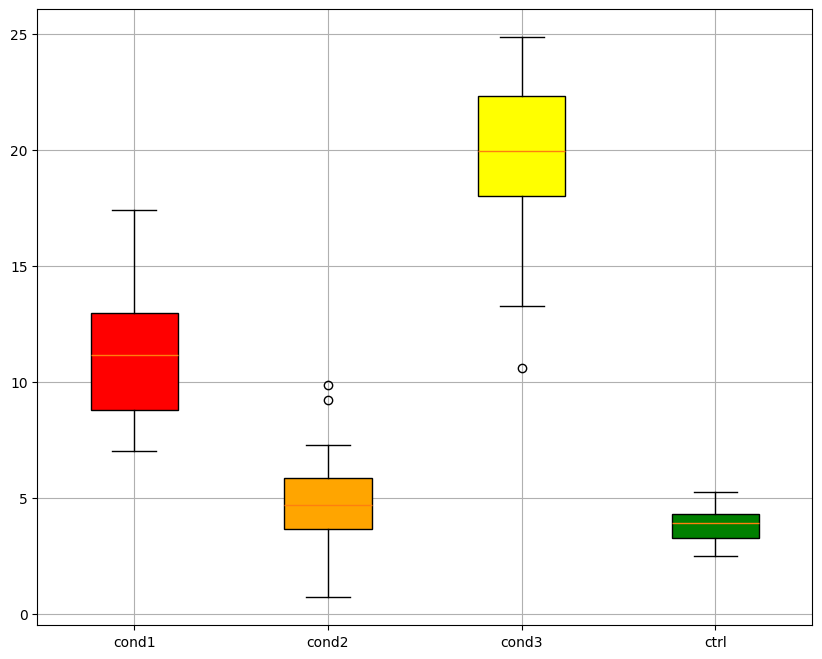

In [27]:
fig = plt.figure(figsize=(10,8))
results = plt.boxplot([data_bar[f'{col}'] for col in data_bar.columns], 
                      labels=['cond1', 'cond2', 'cond3', 'ctrl'],
                      patch_artist=True)

color = ("red", "orange", "yellow", "green")
for i, c in enumerate(color):
    results['boxes'][i].set_facecolor(c)
    
plt.grid()

# Histogram 2D

We want to analyse the relationship between 2 numerical variables.
These two variables are in a numpy 2D array
To do that we plan to vizualize data with an 2D histogram as below

<img src="../images/histogram_2D.png" width="300px" />


In [29]:
linked_vars = np.load('../data/linked_vars.npy')

how many samples are contained in the data set

In [30]:
x = linked_vars[0, :]
y = linked_vars[1, :]

what are the min, max and mean value for these two variables

In [31]:
for v in (x,y):
    print(v.min(), v.max(), v.mean())

-5.040819200223366 3.941423634240521 -0.0006741395329023279
-15.120104816222625 19.86580328914713 3.002658699844036


create the histogram with a colorbar use the *"jet"* colormap

Text(0, 0.5, 'Intensity')

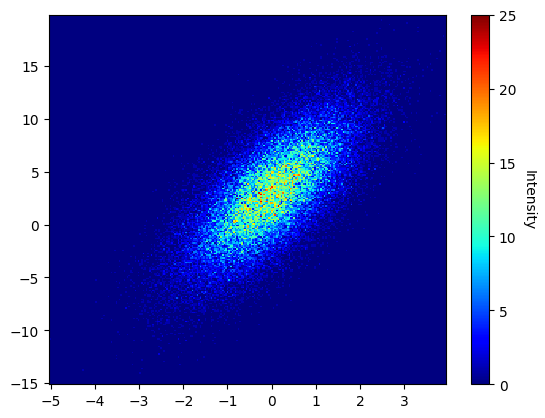

In [32]:
_ = plt.hist2d(x, y, bins=(250, 250), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.ax.set_ylabel("Intensity", rotation=-90, va="bottom")

# Scatter plot

Compare The *Petal length* vs *Petal width*
for the 3 iris species: *setosa*, *versicolor* and *virginica*

In [33]:
iris = pd.read_csv('../data/Iris.csv', sep=',' , header=0, index_col='Id' )

Text(0.5, 1.0, 'Scatter plot Iris sepal')

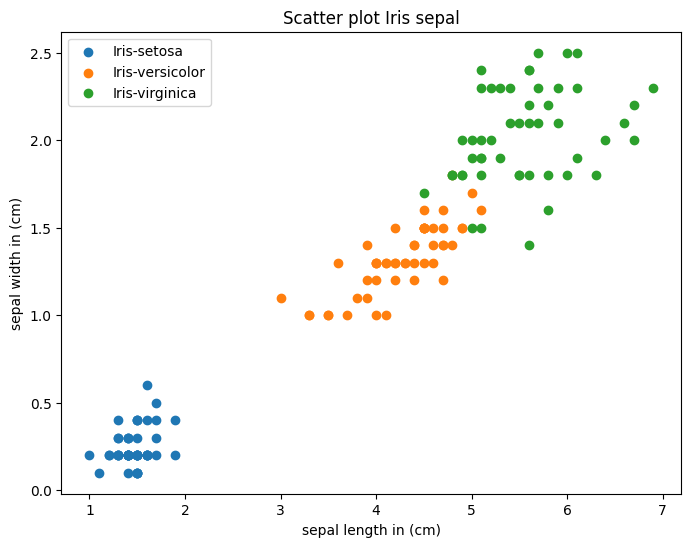

In [34]:
plt.figure(figsize=(8,6))

for specie, data in iris.groupby('Species'):
    plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], label=specie )

plt.xlabel('sepal length in (cm)')
plt.ylabel('sepal width in (cm)')
plt.legend()

plt.title('Scatter plot Iris sepal')